# Demo 2

> Test Fast.ai models with a simple supervised learning test

In [1]:
#| default_exp demo.demo2

In [2]:
#| hide
from nbdev.showdoc import *

%matplotlib inline
from fastai.vision.all import *
from fastai.data.all import *
import torch.nn.functional as F

from Noise2Model.core import *

from IPython.display import clear_output, DisplayHandle
def update_patch(self, obj):
    clear_output(wait=True)
    self.display(obj)
DisplayHandle.update = update_patch

/home/biagio/miniconda3/envs/n2m/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
bs, size = 4, 512
# arch = models.resnet34
path = Path('../_data/Confocal_BPAE_B/')
path_train_raw = Path(path/"raw")
path_train_gt = Path(path/"gt")

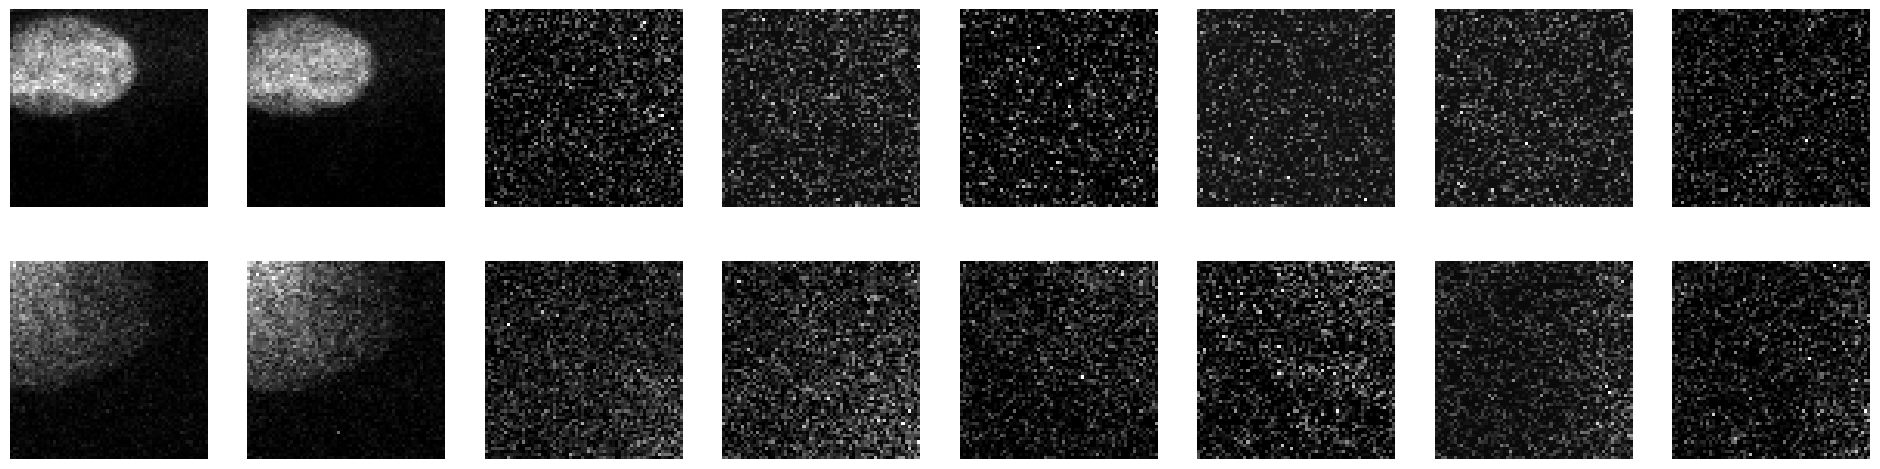

In [4]:
dblock = DataBlock(blocks    = (ImageBlock(cls=PILImageBW), ImageBlock(cls=PILImageBW)),
                   get_items = get_image_files, 
                   get_y = get_noisy_pair,
                   splitter  = RandomSplitter(valid_pct=0.2),
                   item_tfms = RandomCrop(64),
                   )
# dblock.summary(path_train_raw)
# dsets = dblock.datasets(path_train_raw)
# dsets.train[0]
dls = dblock.dataloaders(path_train_raw)
dls.show_batch(max_n=8, cmap='gray')

In [5]:
# m = create_vision_model(models.resnet18, 1, False, n_in=1)
# print(m.children)


In [6]:

# m = nn.Sequential(*list(m.children())[:-1])
# #m.children

# mm = DynamicUnet(m, 1, (64,64), norm_type=None)
#mm.children

In [7]:
# learn = Learner(dls, mm, loss_func = F.l1_loss)
# learn.summary()

In [8]:
# learn.lr_find()

In [9]:
# learn.fit_one_cycle(20, lr_max = 1e-04)

In [10]:
# learn.show_results(max_n=1, cmap='gray')

In [11]:
learn = unet_learner(dls, models.resnet18, loss_func=F.l1_loss, n_in=1, n_out=1, pretrained=True, cut=None)
learn.summary()

DynamicUnet (Input shape: 64 x 1 x 64 x 64)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 32 x 32   
Conv2d                                    3136       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 16 x 16   
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                       

SuggestedLRs(valley=0.00015848931798245758)

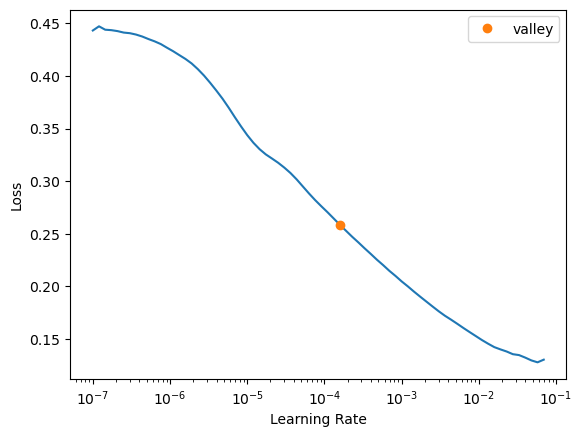

In [12]:
learn.lr_find()

In [13]:
learn.fit_one_cycle(20, lr_max = 1e-04)

epoch,train_loss,valid_loss,time
0,0.259846,0.188637,00:08
1,0.204052,0.080074,00:08
2,0.160889,0.066297,00:08
3,0.129349,0.048601,00:08
4,0.105591,0.044761,00:08
5,0.087515,0.039137,00:08
6,0.073711,0.034266,00:08
7,0.062912,0.031980,00:08
8,0.054316,0.028108,00:08
9,0.047440,0.026064,00:08


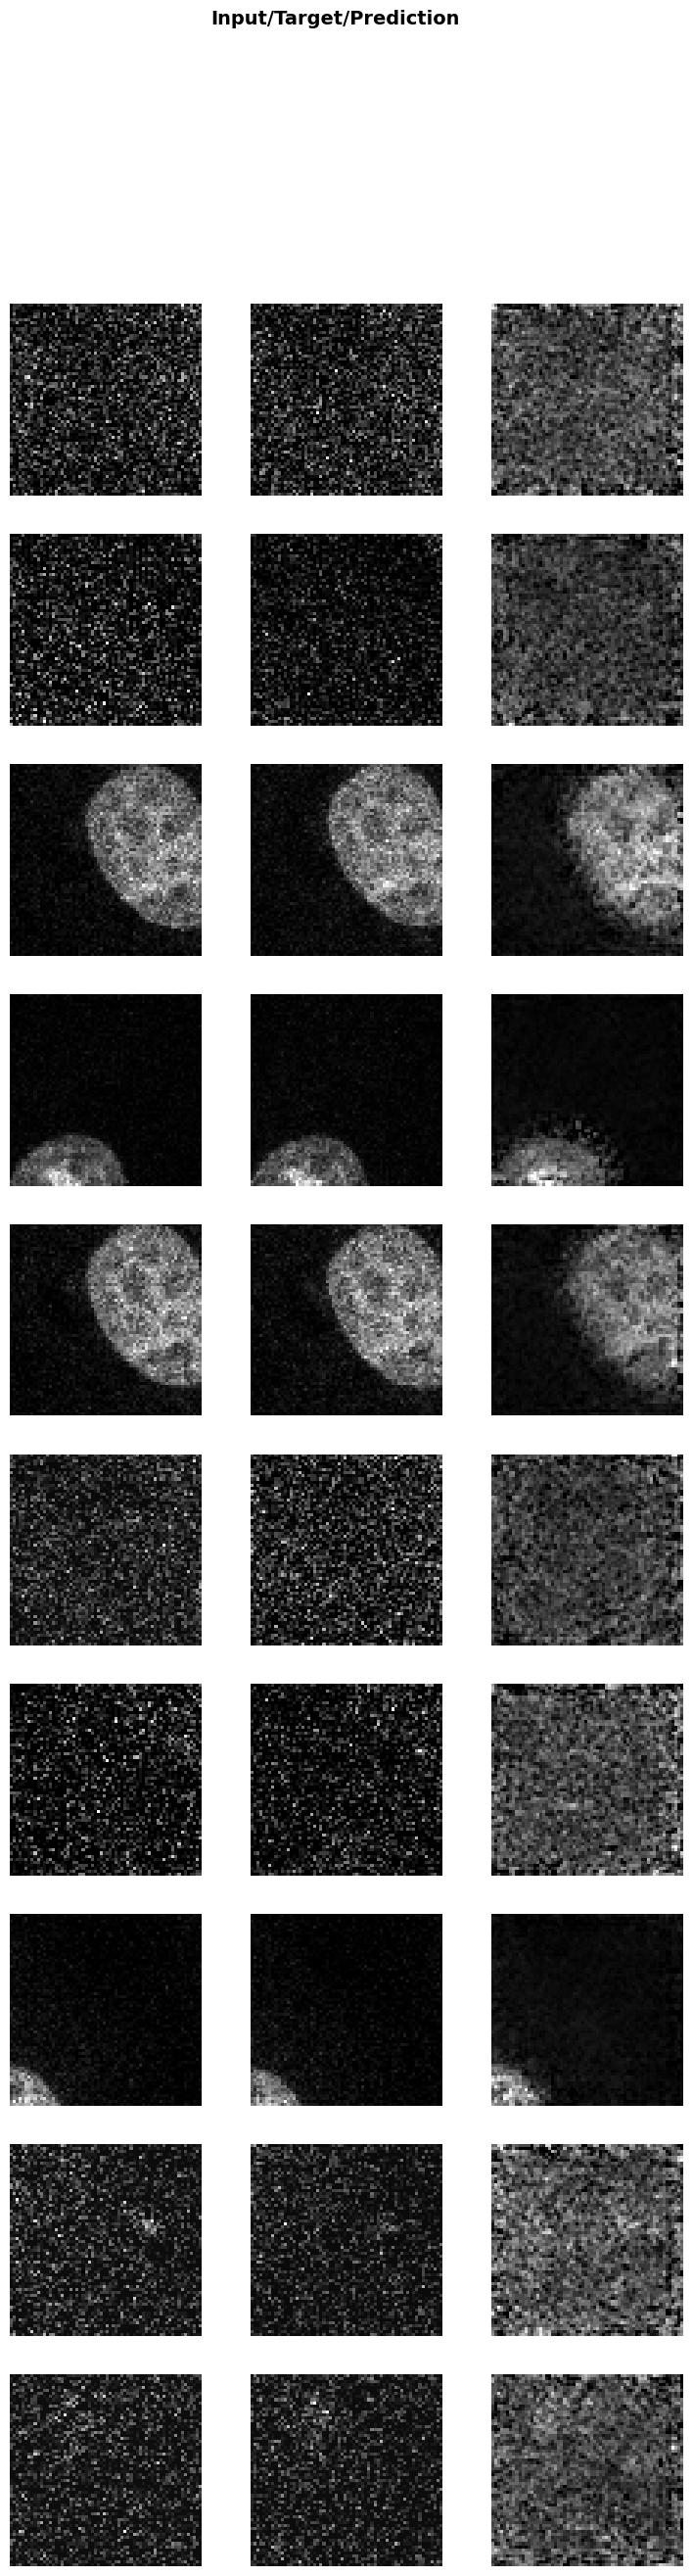

In [14]:
learn.show_results(max_n=10, cmap='gray')

In [15]:
#| hide
import nbdev; nbdev.nbdev_export()